## AI-Powered Resume Screening

# Let's first load the required Python libraries for data analysis and visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import pickle
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load the Resume Dataset and explore its structure

In [3]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

# Let's take a look at the data to understand its structure

In [5]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


# 🧐 **Project Title:** AI-Powered Resume Screening 

## 📌 Problem Statement
Recruiters receive thousands of resumes, making it difficult to manually screen and match the right candidates to job roles. Our goal is to automate this process by building a resume screening system using NLP and ML techniques to classify resumes into suitable job categories.

## 🎯 Objective
To create an AI-driven system that can:
- Automatically classify resumes into predefined categories.
- Extract and visualize key insights from resumes.
- Be deployed for real-time resume screening and matching.

## 🛠️ Tools & Technologies Used
- **Programming Language:** Python
- **Data Handling & EDA:** Pandas, NumPy, Matplotlib, Seaborn
- **NLP:** NLTK, Regular Expressions, WordCloud
- **ML Model:** Naive Bayes, TF-IDF Vectorizer
- **Deep Learning:** TensorFlow, Keras, PyTorch (optional and advanced)
- **Model Evaluation:** Accuracy Score, Confusion Matrix, Classification Report
- **Deployment:** Flask (for real-world backend API)

## 📁 Dataset Overview
- **Dataset Name:** UpdatedResumeDataSet.csv
- **Total Rows:** 962
- **Total Columns:** 2
  - `Category`: The job role/category (target variable)
  - `Resume`: The resume content (input feature)

## 🔥 Final Deliverables
| Module | Description |
|--------|-------------|
| ✅ Resume Classifier | ML/DL Model that classifies resumes into job categories |
| ✅ Flask App on localhost | Web API to upload & predict resume category |
| ✅ Resume Insights | Basic analytics (category-wise distribution, word clouds, etc.) |
| ✅ Deployment Ready | Flask app + model pickle + `.py` files + README |

# 📚 In this step, we clean and prepare the resume texts for model training.
We'll perform: 

Removing HTML tags, Removing special characters, Converting to lowercase,Removing stopwords,Tokenization and Lemmatization

In [9]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
# Function to clean the resume text
def clean_resume(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]*>', '', text)
    # Remove non-alphabetical characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english') and len(word) > 2]
    #Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back to text
    return ' '.join(tokens)

# Apply the cleaning function to the Resume column
df['Cleaned_Resume'] = df['Resume'].apply(clean_resume)

# Display cleaned data
df[['Resume', 'Cleaned_Resume']].head(2)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91951\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Resume,Cleaned_Resume
0,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...
1,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may may uit rgpv data scienti...


# 📊 Now let's explore our dataset by analyzing and visualizing:
Number of resumes per job category

Distribution of resume lengths

Most common words per category using WordCloud

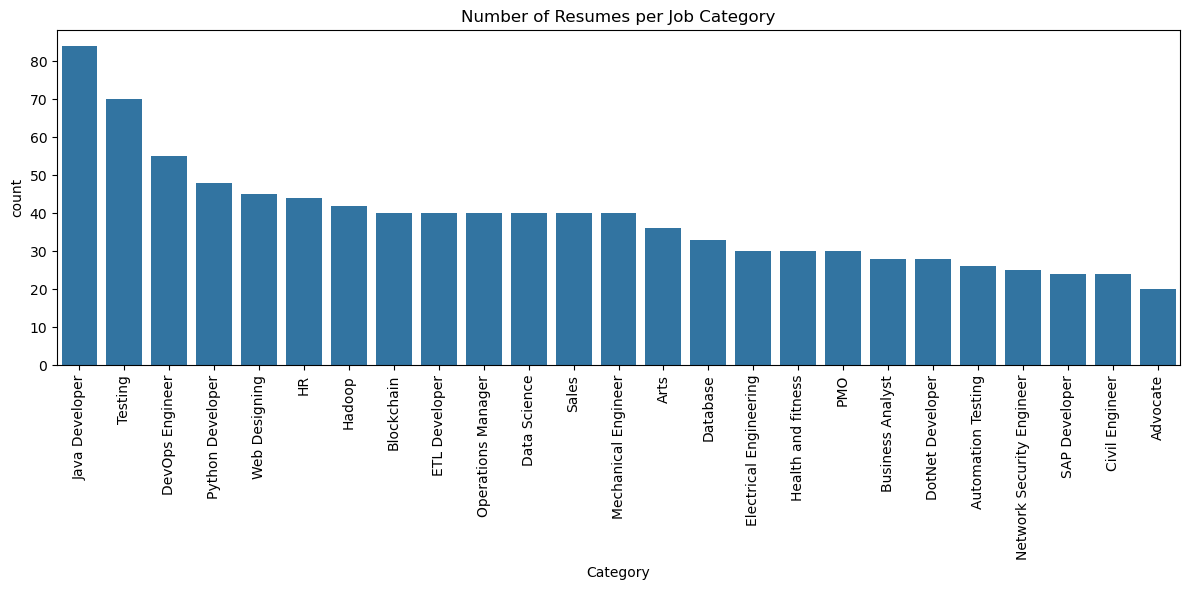

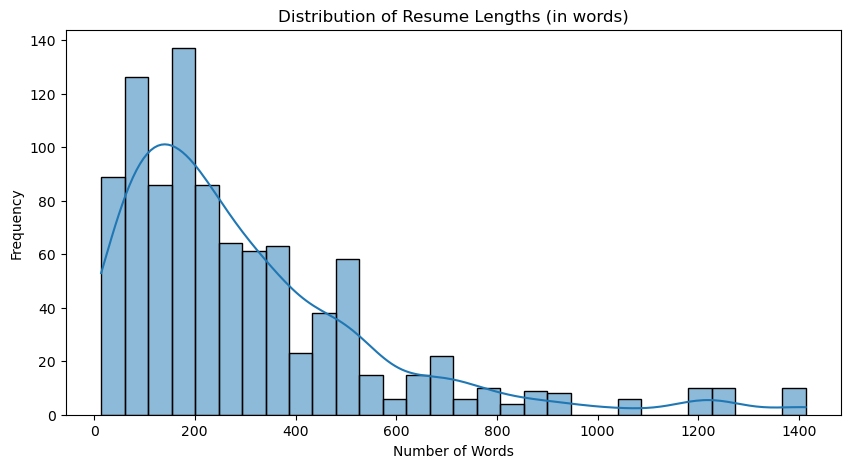

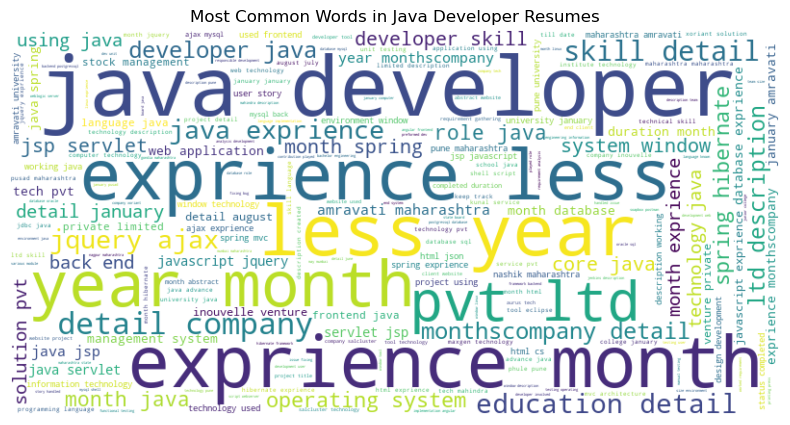

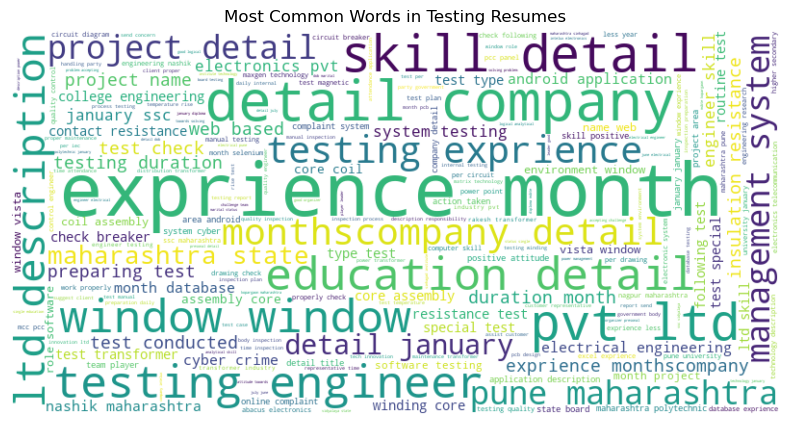

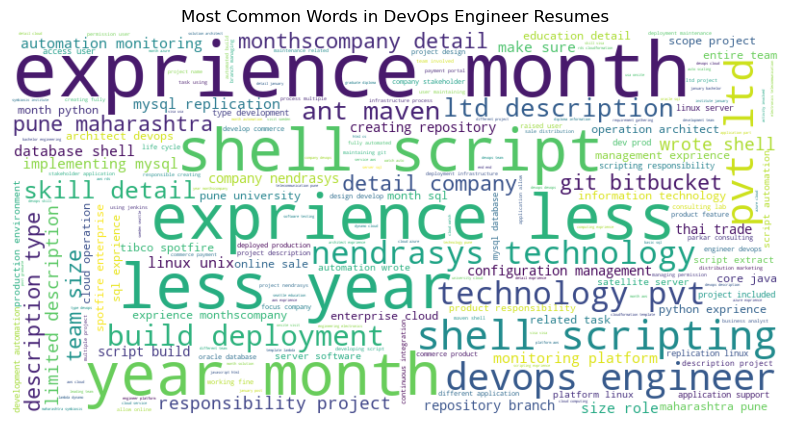

In [11]:
# 1. Number of resumes per category
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index)
plt.title('Number of Resumes per Job Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 2. Distribution of resume lengths
df['Resume_Length'] = df['Cleaned_Resume'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 5))
sns.histplot(df['Resume_Length'], bins=30, kde=True)
plt.title('Distribution of Resume Lengths (in words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# 3. WordCloud for top 3 categories
top_categories = df['Category'].value_counts().head(3).index
for category in top_categories:
    text = ' '.join(df[df['Category'] == category]['Cleaned_Resume'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Most Common Words in {category} Resumes')
    plt.show()


### Feature Extraction using TF-IDF

In [13]:
# Transform the cleaned resume texts into numerical features
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['Cleaned_Resume'])
y = df['Category']

# Model Building and Evaluation (Traditional ML)

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for Random Forest using GridSearchCV
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=3, n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)
print("Best Random Forest Parameters:", rf_grid.best_params_)

# Train and evaluate tuned Random Forest
rf_model = rf_grid.best_estimator_
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Save Random Forest Model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

# Logistic Regression with GridSearchCV
lr_params = {'C': [0.1, 1, 10], 'solver': ['lbfgs']}
lr_grid = GridSearchCV(LogisticRegression(max_iter=1000), lr_params, cv=3, n_jobs=-1, verbose=1)
lr_grid.fit(X_train, y_train)
print("Best Logistic Regression Parameters:", lr_grid.best_params_)

lr_model = lr_grid.best_estimator_
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

# SVM with GridSearchCV
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(SVC(), svm_params, cv=3, n_jobs=-1, verbose=1)
svm_grid.fit(X_train, y_train)
print("Best SVM Parameters:", svm_grid.best_params_)

svm_model = svm_grid.best_estimator_
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

# Naive Bayes (no tuning needed for basic model)
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

with open('naive_bayes_model.pkl', 'wb') as f:
    pickle.dump(nb_model, f)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Accuracy: 1.0
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      1.00      1.00        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electri

# Deep Learning Model using TensorFlow/Keras

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.2634 - loss: 3.1152 - val_accuracy: 0.6269 - val_loss: 2.4483
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6928 - loss: 2.0260 - val_accuracy: 0.9430 - val_loss: 0.8868
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9520 - loss: 0.5839 - val_accuracy: 0.9948 - val_loss: 0.1754
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9979 - loss: 0.1125 - val_accuracy: 0.9948 - val_loss: 0.0554
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 1.0000 - loss: 0.0363 - val_accuracy: 0.9948 - val_loss: 0.0302
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 1.0000 - loss: 0.0190 - val_accuracy: 0.9948 - val_loss: 0.0258
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 1.0000 - loss: 0.0137 - val_accuracy: 0.9948 - val_loss: 0.0175
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 1.0000 - loss: 0.0087 - val_accuracy: 0.9948 - v

Deep Learning Model Accuracy: 0.9948


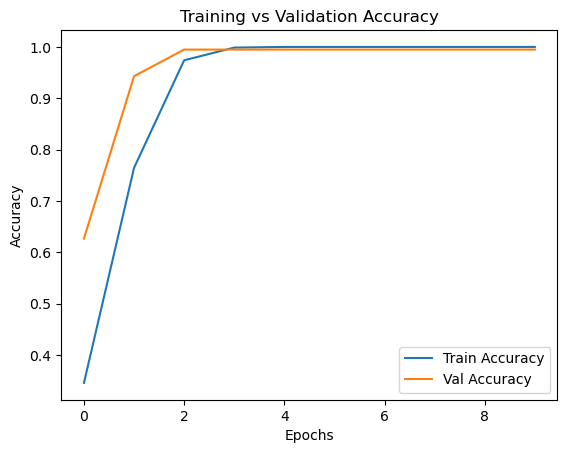

In [17]:
import warnings
warnings.filterwarnings('ignore')
# Convert text data to dense format and labels to one-hot
X_dense = X.toarray()
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Split data
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X_dense, y_categorical, test_size=0.2, random_state=42)

# Build the deep learning model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train_dl.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(y_categorical.shape[1], activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_dl, y_train_dl, epochs=10, batch_size=32, validation_data=(X_test_dl, y_test_dl))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_dl, y_test_dl)
print(f"Deep Learning Model Accuracy: {accuracy:.4f}")

# Save the model
model.save("deep_learning_resume_classifier.h5")

# Save the label encoder for decoding predictions later
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

#Visualization
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

> ⚠️ **Note on Model Saving Format**
>
> While saving the deep learning model, Keras raises a warning that HDF5 format (`.h5`) is considered legacy.
> It recommends using the native Keras format instead (`.keras` extension).
>
> However, `.h5` is still widely supported and perfectly fine for most real-world applications and deployments,
> especially with Flask-based setups. We’re continuing with `.h5` for compatibility and simplicity.
>
> ✅ If preferred, you can replace:
> `model.save("deep_learning_resume_classifier.h5")`
> with:
> `model.save("deep_learning_resume_classifier.keras")`


# Deep Learning with LSTM (Sequential Modeling)

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Prepare text for LSTM
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['Cleaned_Resume'])

X_seq = tokenizer.texts_to_sequences(df['Cleaned_Resume'])
X_pad = pad_sequences(X_seq, maxlen=300)

# Encode labels again
y_lstm = to_categorical(label_encoder.transform(df['Category']))

X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_pad, y_lstm, test_size=0.2, random_state=42)

# LSTM Model
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=10000, output_dim=128, input_length=300))
model_lstm.add(LSTM(128, return_sequences=False))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dense(y_lstm.shape[1], activation='softmax'))

model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_lstm = model_lstm.fit(X_train_lstm, y_train_lstm, epochs=5, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))

loss_lstm, acc_lstm = model_lstm.evaluate(X_test_lstm, y_test_lstm)
print(f"LSTM Model Accuracy: {acc_lstm:.4f}")

model_lstm.save("lstm_resume_classifier.h5")

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 186ms/step - accuracy: 0.1228 - loss: 3.1966 - val_accuracy: 0.1451 - val_loss: 3.0383
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 183ms/step - accuracy: 0.1995 - loss: 2.9340 - val_accuracy: 0.1606 - val_loss: 2.4912
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - accuracy: 0.3174 - loss: 2.1789 - val_accuracy: 0.5285 - val_loss: 1.7723
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - accuracy: 0.5958 - loss: 1.5631 - val_accuracy: 0.6736 - val_loss: 1.2248
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - accuracy: 0.7250 - loss: 1.0891 - val_accuracy: 0.7409 - val_loss: 0.9937
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7257 - loss: 1.0197


LSTM Model Accuracy: 0.7409


In [55]:
# Evaluate LSTM model
loss_lstm, acc_lstm = model_lstm.evaluate(X_test_lstm, y_test_lstm)
print(f"LSTM Model Accuracy: {acc_lstm:.4f}")

# Save the LSTM model
model_lstm.save("lstm_resume_classifier.h5")

# Save tokenizer
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.7257 - loss: 1.0197


LSTM Model Accuracy: 0.7409


# Deployment using Flask

In [32]:
import os

# Create main project directory
os.makedirs("ResumeScreeningApp/templates", exist_ok=True)
os.makedirs("ResumeScreeningApp/static", exist_ok=True)
os.makedirs("ResumeScreeningApp/models", exist_ok=True)


In [47]:
# Save your model
with open("ResumeScreeningApp/models/random_forest_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

# Save TF-IDF vectorizer
with open("ResumeScreeningApp/models/tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

# Save label encoder
with open("ResumeScreeningApp/models/label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

In [53]:
# Create index.html inside templates folder
with open("ResumeScreeningApp/templates/index.html", "w") as f:
    f.write("""<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Resume Screening App</title>
</head>
<body>
    <h2>Resume Screening</h2>
    <form action="/predict" method="post">
        <textarea name="resume" rows="15" cols="100" placeholder="Paste resume text here..."></textarea><br><br>
        <input type="submit" value="Predict Job Category">
    </form>
    {% if prediction_text %}
        <h3>{{ prediction_text }}</h3>
    {% endif %}
</body>
</html>""")


🧪 To Test the App:

Run this in terminal:

cd ResumeScreeningApp

flask run

Open browser at: http://127.0.0.1:5000
